In [138]:
import sympy as sp 
import numpy as np

In [139]:
m_31 = sp.symbols("\Delta{m_{31}^2}", real = True, constant=True,positive=True)
th_13,th_23,th_23 = sp.symbols('theta_13 theta_23 theta_23', real = True, constant=True)
E = sp.symbols('E', real = True, constant=True)
A= sp.symbols("A_{CC}", real = True, constant=True)
eem = sp.symbols("\epsilon_{e\mu}", real = True, constant=True)
eet = sp.symbols("\epsilon_{e\\tau}", real = True, constant=True)
s_13 = m_31/(m_31 - A) * sp.sin(th_13)
s_23 = sp.sin(th_23)
c_23 = sp.cos(th_23)
L = sp.symbols("L", real = True, constant=True)

In [140]:
Pme_full = 4*s_13**2 * s_23**2 * sp.sin((m_31 -A)*L/(4*E)) - 2*eet * s_13 * s_23 * c_23**2 * (2*sp.sin(A*L/(4*E))**2 - 2*sp.sin(m_31*L/(4*E))**2 + 2*sp.sin((m_31 - A)*L/(4*E))**2+sp.sin(A*L/(2*E)) - sp.sin(m_31*L/(2*E)) + sp.sin((m_31 - A)*L/(2*E))) + 8*eem * s_13*s_23**2 * A/(m_31-A) * sp.sin((m_31 - A)*L/(4*E))**2 + 2*eet*s_13*s_23**2*c_23*(2*sp.sin(A*L/(4*E))**2 - 2*sp.sin(m_31*L/(4*E))**2 + 2*sp.sin((m_31 - A)*L/(4*E))**2
+sp.sin(A*L/(2*E)) - sp.sin(m_31*L/(2*E)) + sp.sin((m_31 - A)*L/(2*E)) + 4*A/(m_31-A) * sp.sin((m_31-A)*L/(4*E))**2)

Pme_simplified = 4*s_13**2 * s_23**2 * sp.sin((m_31 -A)*L/(4*E)) + 8*s_13**2*s_23*eem + 2*s_13*s_23*c_23*(eet*s_23 - eem*c_23)* (2*(sp.sin(A*L/(4*E))**2 - sp.sin(m_31*L/(4*E))**2 + sp.sin((m_31-A)*L/(4*E))**2) + sp.sin(A*L/(2*E)) - sp.sin(m_31*L/(2*E)) + sp.sin((m_31-A)*L/(2*E)) + 4*A/(m_31-A)*sp.sin((m_31-A)*L/(4*E))**2)

P_diff_simplified = 8*s_13**2*s_23*eem + 2*s_13*s_23*c_23*(eet*s_23 - eem*c_23)* (2*(sp.sin(A*L/(4*E))**2 - sp.sin(m_31*L/(4*E))**2 + sp.sin((m_31-A)*L/(4*E))**2) + sp.sin(A*L/(2*E)) - sp.sin(m_31*L/(2*E)) + sp.sin((m_31-A)*L/(2*E)) + 4*A/(m_31-A)*sp.sin((m_31-A)*L/(4*E))**2)
Pme_simplified_no_eem = Pme_simplified.subs(eem,0)
Pme_simplified_no_eet = Pme_simplified.subs(eet,0)

In [192]:
print(sp.latex(Pme_simplified))

\frac{8 \left(\Delta{m_{31}^2}\right)^{2} \epsilon_{e\mu} \sin^{2}{\left(\theta_{13} \right)} \sin{\left(\theta_{23} \right)}}{\left(- A_{CC} + \Delta{m_{31}^2}\right)^{2}} + \frac{4 \left(\Delta{m_{31}^2}\right)^{2} \sin^{2}{\left(\theta_{13} \right)} \sin^{2}{\left(\theta_{23} \right)} \sin{\left(\frac{L \left(- A_{CC} + \Delta{m_{31}^2}\right)}{4 E} \right)}}{\left(- A_{CC} + \Delta{m_{31}^2}\right)^{2}} + \frac{2 \Delta{m_{31}^2} \left(- \epsilon_{e\mu} \cos{\left(\theta_{23} \right)} + \epsilon_{e\tau} \sin{\left(\theta_{23} \right)}\right) \left(\frac{4 A_{CC} \sin^{2}{\left(\frac{L \left(- A_{CC} + \Delta{m_{31}^2}\right)}{4 E} \right)}}{- A_{CC} + \Delta{m_{31}^2}} + 2 \sin^{2}{\left(\frac{A_{CC} L}{4 E} \right)} + \sin{\left(\frac{A_{CC} L}{2 E} \right)} - 2 \sin^{2}{\left(\frac{L \Delta{m_{31}^2}}{4 E} \right)} - \sin{\left(\frac{L \Delta{m_{31}^2}}{2 E} \right)} + 2 \sin^{2}{\left(\frac{L \left(- A_{CC} + \Delta{m_{31}^2}\right)}{4 E} \right)} + \sin{\left(\frac{L \left(- A_

In [183]:
from src.probability.functions import dc_params_nsi, GF, GeVtocm1, N_A, r_earth, GeV2tokm1
Pme_func = sp.lambdify(E, Pme_simplified.subs({th_13 :dc_params_nsi['theta_13'], th_23 :dc_params_nsi['theta_23'], m_31 :dc_params_nsi['dm_31'], A: 2*np.sqrt(2) * GF * 0.5 * N_A * 8.44 * (1/GeVtocm1)**3*E*1e9, L: 2*r_earth*GeV2tokm1, eet: 0, eem: 0, E: 1e9*E}))

In [184]:
2*r_earth/GeV2tokm1*1e18

2.5143403634981544e+21

In [187]:
Pme_simplified.subs({th_13 :dc_params_nsi['theta_13'], th_23 :dc_params_nsi['theta_23'], m_31 :dc_params_nsi['dm_31'], A: 2*np.sqrt(2) * GF * 0.5 * N_A * 8.44 * (1/GeVtocm1)**3*E*1e9, L: 2*r_earth*GeV2tokm1, eet: 0, eem: 0, E: 1e9*E})

0.045136*sin(1.61432563344481e-5*(0.0023653 - 0.000644180180945899*E)/E)/(1 - 0.272346079121422*E)**2

In [180]:
test_dict = dc_params_nsi.copy()
test_dict.update({'e_em': 0, 'e_et': 0})

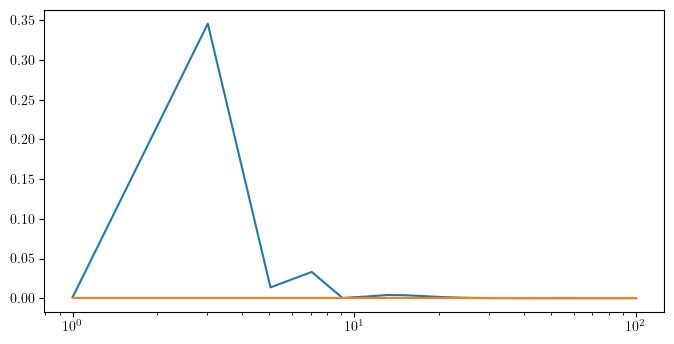

In [186]:
p = P_num_over_E('m', np.linspace(1,100,50), nsi=True, params = test_dict, material=8.44)[0,:]
plt.plot(np.linspace(1,100,50), p)
plt.plot(np.linspace(1,100,50), Pme_func(np.linspace(1,100,50)))
plt.xscale('log')

In [1]:
import sys,os
import numpy as np
os.chdir('../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
from src.probability.numerical import P_num_over_E
from src.probability.functions import dc_params_nsi
Pmx = P_num_over_E('m', [50], nsi=True, params = dc_params_nsi)
Pme = Pmx[1]

In [2]:
eem_range = np.linspace(-0.3,0.3,29)
eet_range = np.linspace(-0.3,0.3,29)
E_range = [5, 25, 50]
param_list = []
for eet in eet_range:
    for eem in eem_range:
        dicta = dc_params_nsi.copy()
        dicta.update({'e_em': eem, 'e_et': eet})
        param_list.append(dicta)

In [3]:
Pme = []
Pme_SI = P_num_over_E('m', E_range, nsi=False, params = dc_params_nsi)[0,:]
for p in param_list:
    prob = P_num_over_E('m', E_range, nsi=True, params = p)[0,:] - Pme_SI
    Pme.append(prob)
Pme = np.array(Pme).reshape(len(eem_range), len(eet_range), len(E_range))

C:\Users\Martin\AppData\Local\Temp/ipykernel_14952/933911442.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax[i].set_xticklabels(np.round(eem_range[::11],2))
C:\Users\Martin\AppData\Local\Temp/ipykernel_14952/933911442.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax[i].set_yticklabels(np.round(eet_range[::5],2))


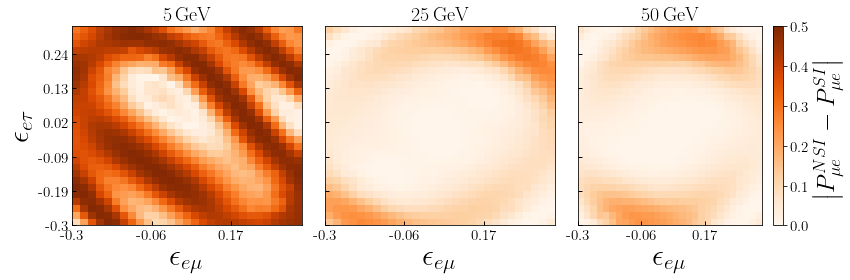

In [40]:
import matplotlib.pyplot as plt
import matplotlib 
from src.plotter import savethesis
from matplotlib.colors import CenteredNorm
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{siunitx,physics}')

fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)
titles = [r'$\SI{5}{\GeV}$', r'$\SI{25}{\GeV}$', r'$\SI{50}{\GeV}$']

for i in range(len(E_range)):
    if i == 0:
        im = ax[0].pcolormesh(np.abs(Pme[:,:,0].T), cmap='Oranges', vmax=0.5,vmin=0)
    else:
        im = ax[i].pcolormesh(np.abs(Pme[:,:,i].T), cmap='Oranges', vmax=0.5,vmin=0)
    ax[i].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 4, zorder=20)
    ax[i].set_xlabel(r'$\epsilon_{e\mu}$', fontsize=30)
    ax[0].set_ylabel(r'$\epsilon_{e\tau}$', fontsize=30)
    ax[i].set_title(titles[i], fontsize=20)
    _=ax[i].set_xticklabels(np.round(eem_range[::11],2))
    _=ax[i].set_yticklabels(np.round(eet_range[::5],2))

    ax[i].xaxis.get_major_formatter()._usetex = True
    ax[i].yaxis.get_major_formatter()._usetex = True
cbar = plt.colorbar(im, ax = ax[2], norm = CenteredNorm(0))
cbar.set_label(r'$\abs{P_{\mu e}^{NSI} - P_{\mu e}^{SI}}$', fontsize=25)
cbar.ax.tick_params(labelsize=15)
    
#plt.suptitle('$P_{NSI} - P_{SI}$', fontsize=15)
plt.tight_layout()

savethesis(fig,'eem_eet_prob.pdf')